# 응용통계학
> midterm

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

In [90]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table


위에서 데이터를 하나 선정하여 

1. 문제를 세팅 (반응변수 및 설명변수 등)

2. 모형 적합 

3. 모형 해석 및 추론

4. 모형 진단

5. 각 회귀계수에 대한 95% 신뢰구간을 Bootstrap에 근거하여 구성하고 이를 이론적인 결과에 의해 산출되는 신뢰구간과 비교한 후 비슷하게 도출되는지 확인할 것. 비슷하다면 왜인지, 차이가 있다면 어떤 이유로 판단되는지 등을 기술,

 

- 데이터는 꼭 위 링크에서 선정하지 않고 다른 데이터를 사용하여도 무방함

- R 뿐 아니라 다른 tool을 이용하여도 무방함.

- 분석과정 및 결과/해석 등을 문서로 정리하여 제출 (소스코드 포함) 

In [12]:
energydata<-read.csv("energydata_complete.csv",header=TRUE)
str(energydata)

'data.frame':	19735 obs. of  29 variables:
 $ date       : chr  "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" "2016-01-11 17:30:00" ...
 $ Appliances : int  60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : int  30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 45 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.7 45.5 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num  7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num  84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.4 41.3 41.2 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.

Attribute Information:

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

First floor

![](https://ars.els-cdn.com/content/image/1-s2.0-S0378778816308970-gr5.jpg)

Second floor

![](https://ars.els-cdn.com/content/image/1-s2.0-S0378778816308970-gr6.jpg)

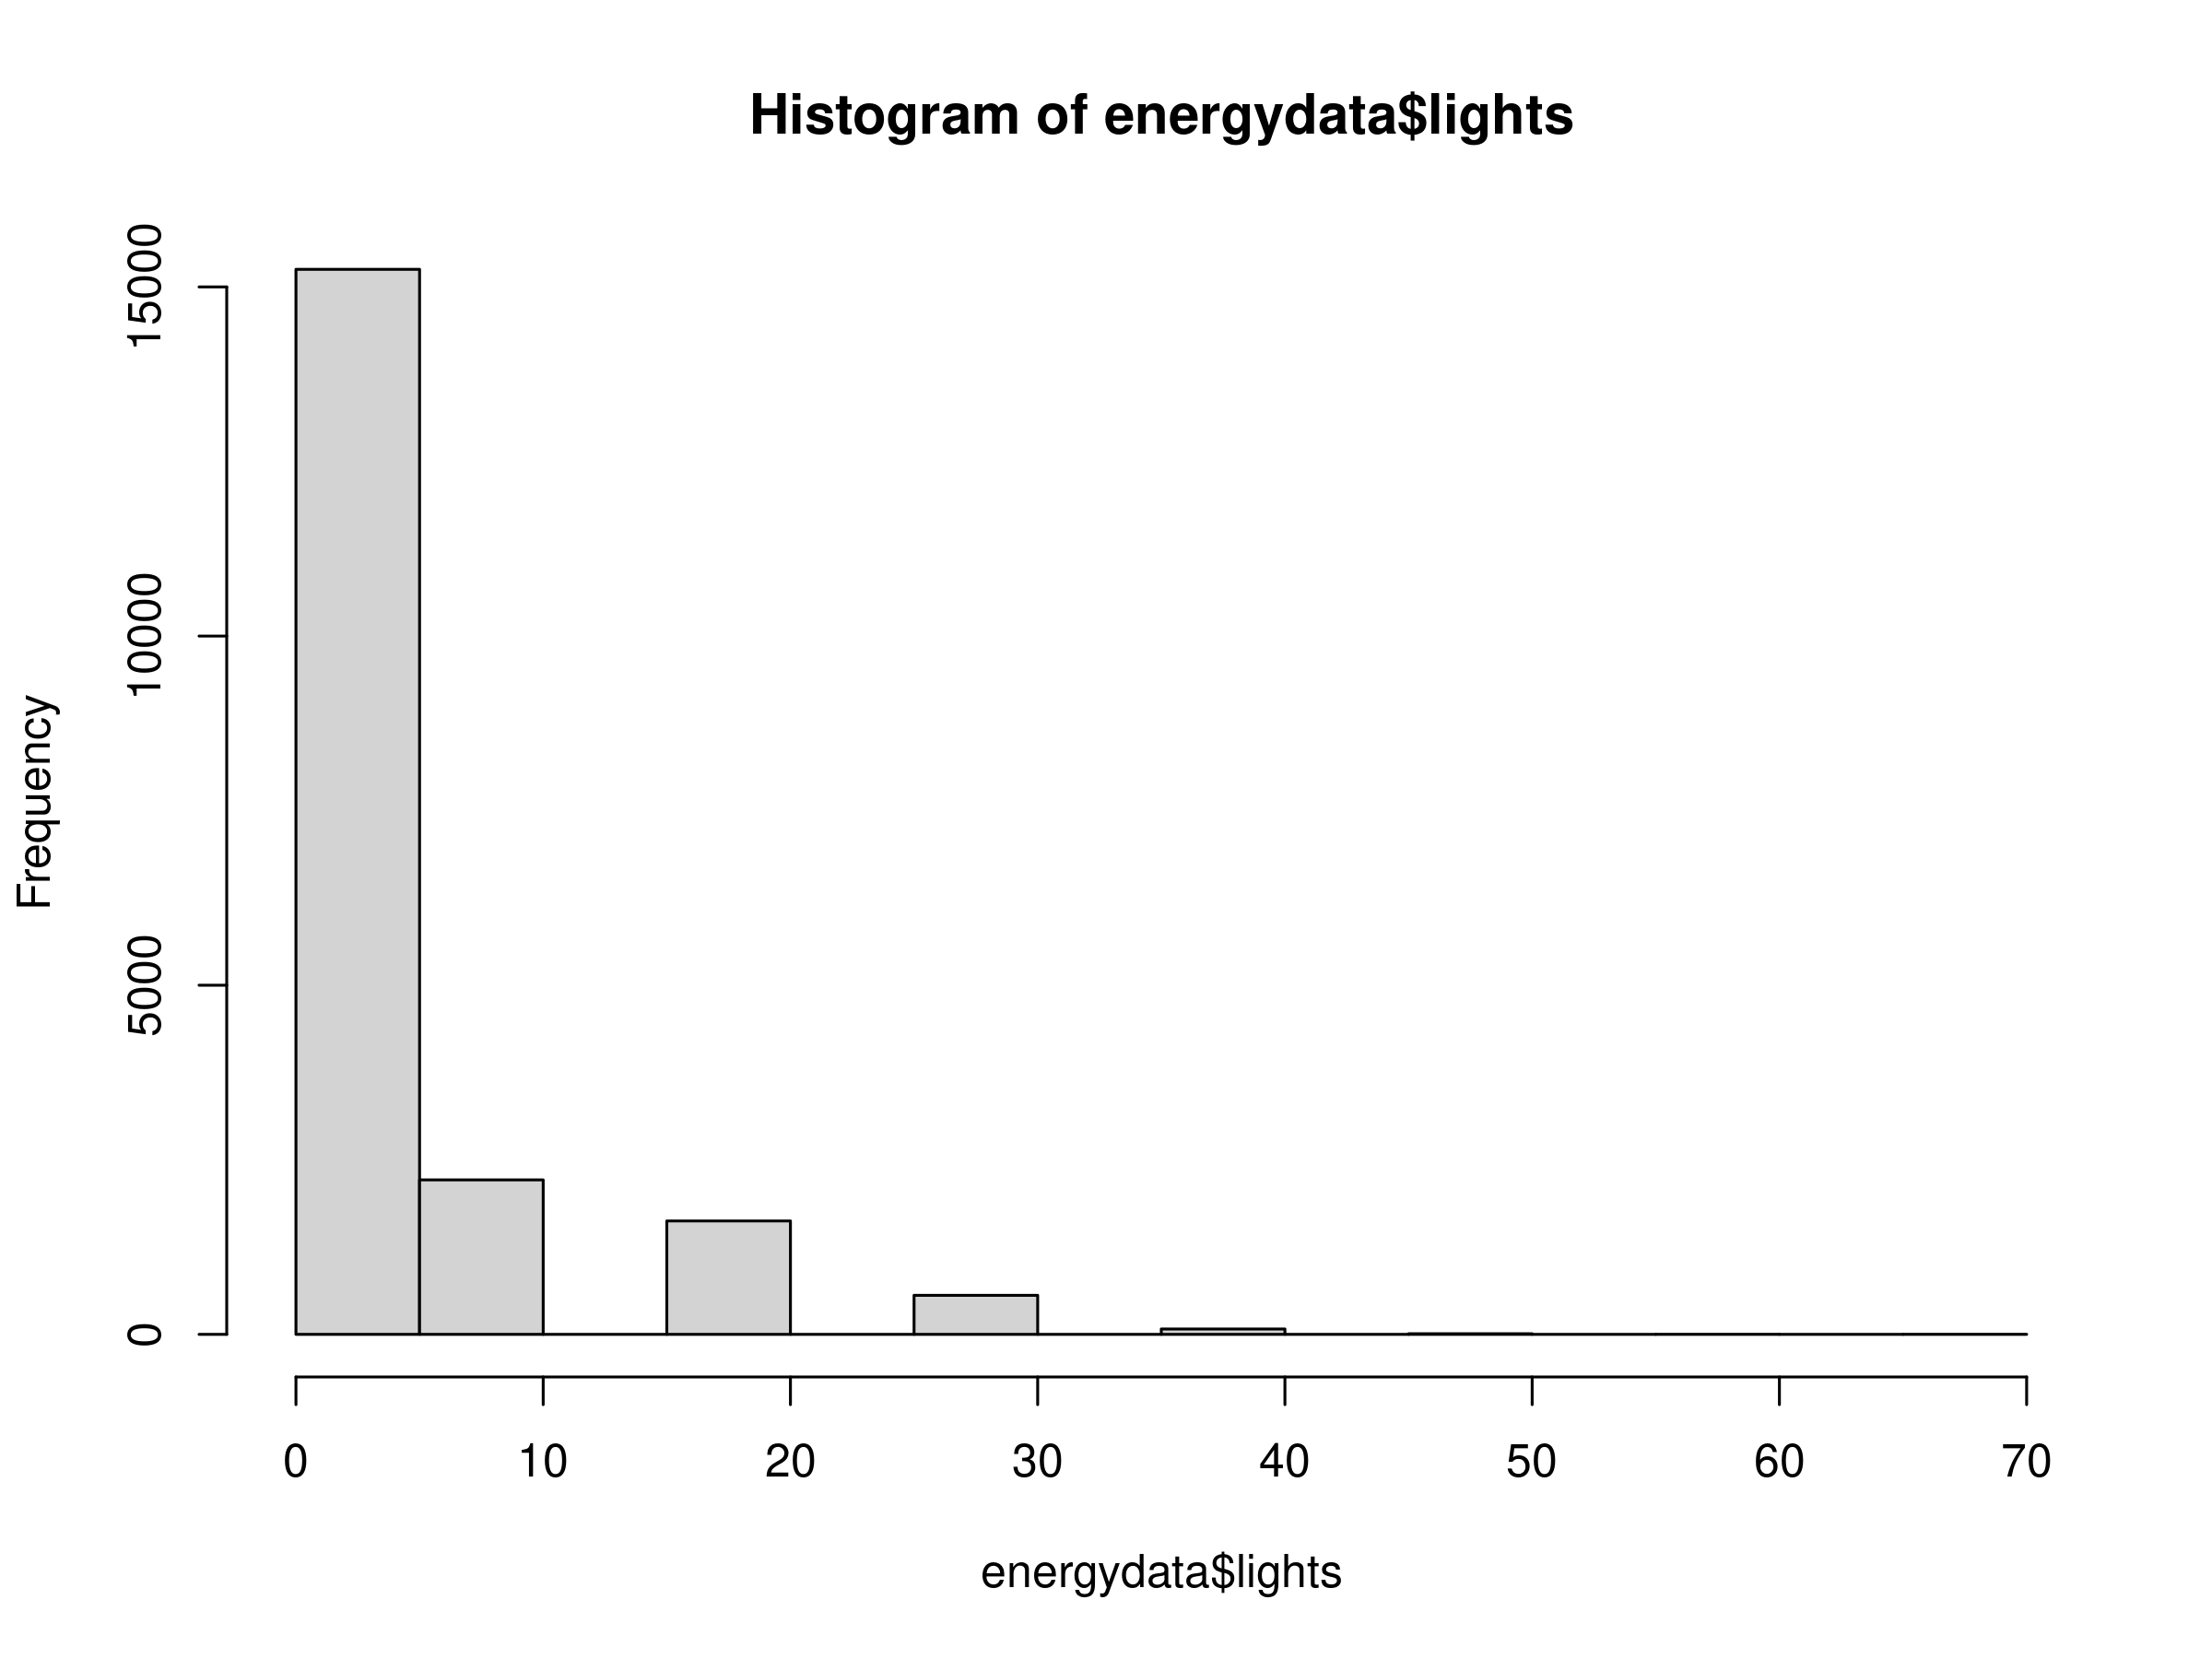

In [91]:
hist(energydata$lights)

https://www.kaggle.com/code/msand1984/appliance-energy-prediction

구별 변수
- 온도 "T1","T2","T3","T4","T5","T6","T7","T8","T9"
- 습도 "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"
- 날씨 "T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"
- 빛 "lights"
- 랜덤 "rv1", "rv2"

In [92]:
summary(energydata[,c("T1","T2","T3","T4","T5","T6","T7","T8","T9")])

       T1              T2              T3              T4       
 Min.   :16.79   Min.   :16.10   Min.   :17.20   Min.   :15.10  
 1st Qu.:20.76   1st Qu.:18.79   1st Qu.:20.79   1st Qu.:19.53  
 Median :21.60   Median :20.00   Median :22.10   Median :20.67  
 Mean   :21.69   Mean   :20.34   Mean   :22.27   Mean   :20.86  
 3rd Qu.:22.60   3rd Qu.:21.50   3rd Qu.:23.29   3rd Qu.:22.10  
 Max.   :26.26   Max.   :29.86   Max.   :29.24   Max.   :26.20  
       T5              T6               T7              T8       
 Min.   :15.33   Min.   :-6.065   Min.   :15.39   Min.   :16.31  
 1st Qu.:18.28   1st Qu.: 3.627   1st Qu.:18.70   1st Qu.:20.79  
 Median :19.39   Median : 7.300   Median :20.03   Median :22.10  
 Mean   :19.59   Mean   : 7.911   Mean   :20.27   Mean   :22.03  
 3rd Qu.:20.62   3rd Qu.:11.256   3rd Qu.:21.60   3rd Qu.:23.39  
 Max.   :25.80   Max.   :28.290   Max.   :26.00   Max.   :27.23  
       T9       
 Min.   :14.89  
 1st Qu.:18.00  
 Median :19.39  
 Mean   :19.49 

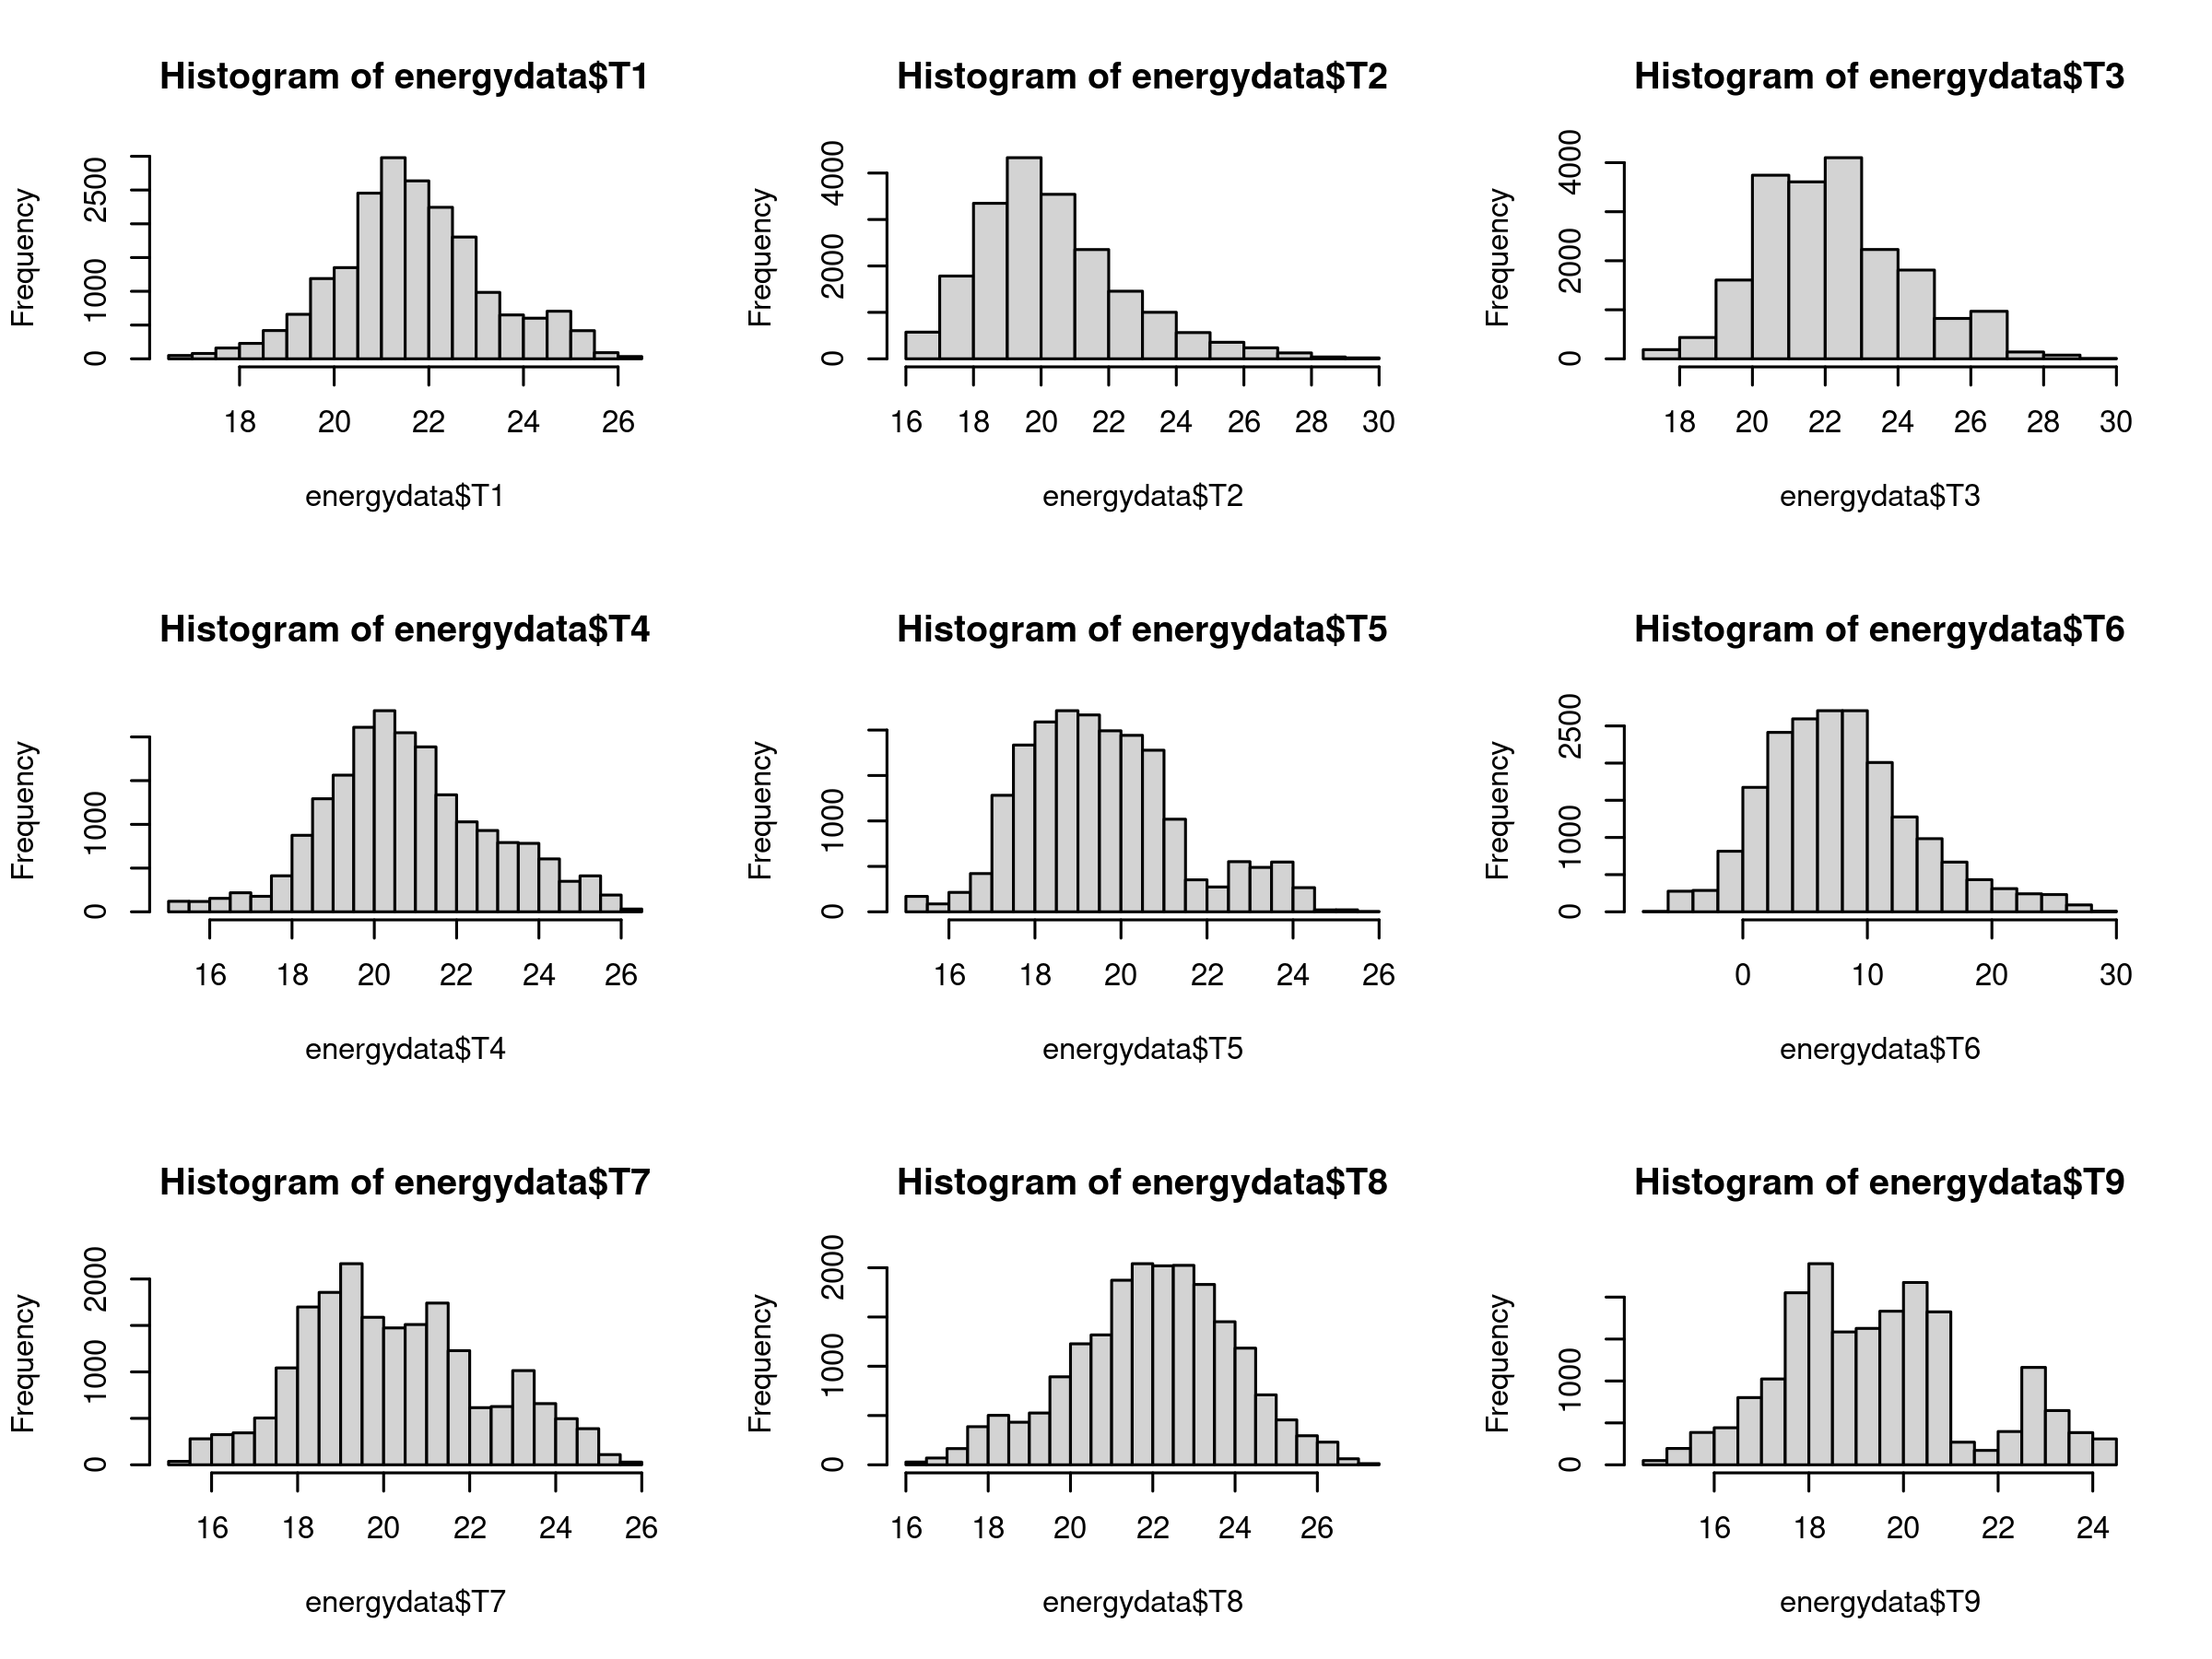

In [93]:
par(mfrow=c(3,3))
hist(energydata$T1)
hist(energydata$T2)
hist(energydata$T3)
hist(energydata$T4)
hist(energydata$T5)
hist(energydata$T6)
hist(energydata$T7)
hist(energydata$T8)
hist(energydata$T9)

온도 데이터 분석, T6 이 낮은 이유는 밖에 있는 센서이기 때문이다.

In [94]:
summary(energydata[,c("RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9")])

      RH_1            RH_2            RH_3            RH_4      
 Min.   :27.02   Min.   :20.46   Min.   :28.77   Min.   :27.66  
 1st Qu.:37.33   1st Qu.:37.90   1st Qu.:36.90   1st Qu.:35.53  
 Median :39.66   Median :40.50   Median :38.53   Median :38.40  
 Mean   :40.26   Mean   :40.42   Mean   :39.24   Mean   :39.03  
 3rd Qu.:43.07   3rd Qu.:43.26   3rd Qu.:41.76   3rd Qu.:42.16  
 Max.   :63.36   Max.   :56.03   Max.   :50.16   Max.   :51.09  
      RH_5            RH_6            RH_7            RH_8      
 Min.   :29.82   Min.   : 1.00   Min.   :23.20   Min.   :29.60  
 1st Qu.:45.40   1st Qu.:30.02   1st Qu.:31.50   1st Qu.:39.07  
 Median :49.09   Median :55.29   Median :34.86   Median :42.38  
 Mean   :50.95   Mean   :54.61   Mean   :35.39   Mean   :42.94  
 3rd Qu.:53.66   3rd Qu.:83.23   3rd Qu.:39.00   3rd Qu.:46.54  
 Max.   :96.32   Max.   :99.90   Max.   :51.40   Max.   :58.78  
      RH_9      
 Min.   :29.17  
 1st Qu.:38.50  
 Median :40.90  
 Mean   :41.55  
 3rd 

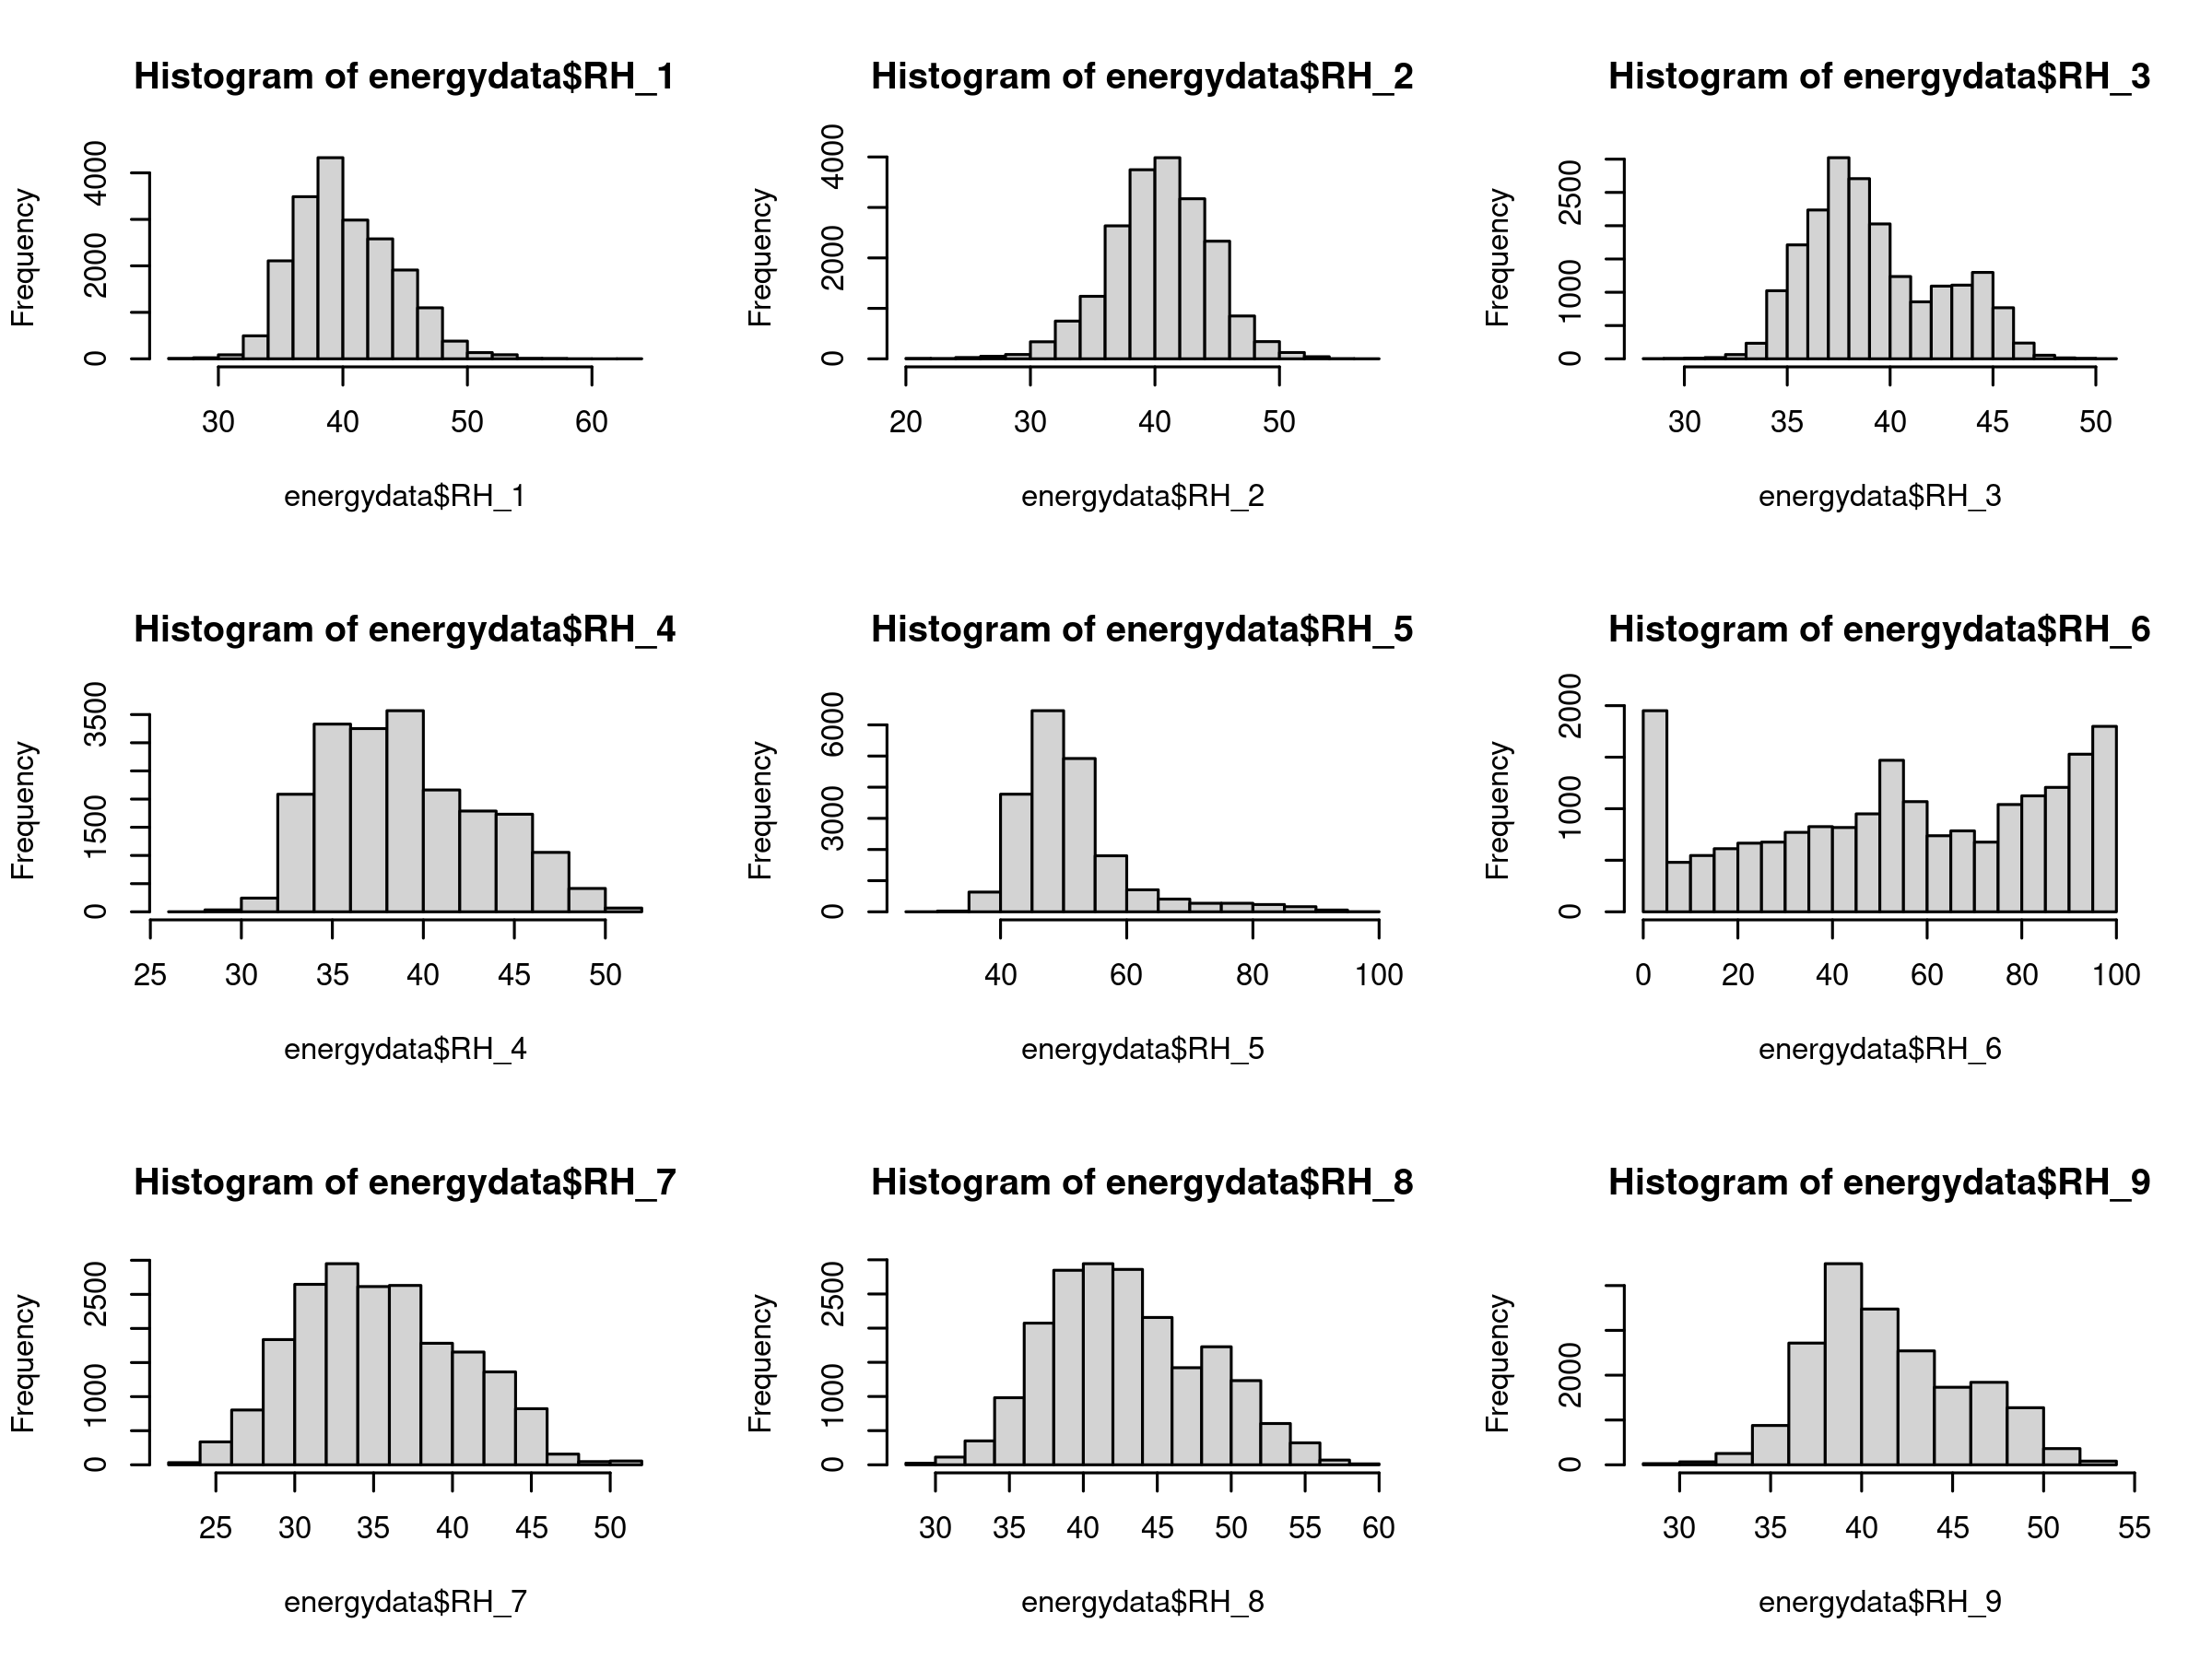

In [95]:
par(mfrow=c(3,3))
hist(energydata$RH_1)
hist(energydata$RH_2)
hist(energydata$RH_3)
hist(energydata$RH_4)
hist(energydata$RH_5)
hist(energydata$RH_6)
hist(energydata$RH_7)
hist(energydata$RH_8)
hist(energydata$RH_9)

습도 데이터 분석, RH5화장실, RH6 외부의 데이터가 좀 다르다

In [96]:
summary(energydata[,c("T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility")])

     T_out          Tdewpoint          RH_out        Press_mm_hg   
 Min.   :-5.000   Min.   :-6.600   Min.   : 24.00   Min.   :729.3  
 1st Qu.: 3.667   1st Qu.: 0.900   1st Qu.: 70.33   1st Qu.:750.9  
 Median : 6.917   Median : 3.433   Median : 83.67   Median :756.1  
 Mean   : 7.412   Mean   : 3.761   Mean   : 79.75   Mean   :755.5  
 3rd Qu.:10.408   3rd Qu.: 6.567   3rd Qu.: 91.67   3rd Qu.:760.9  
 Max.   :26.100   Max.   :15.500   Max.   :100.00   Max.   :772.3  
   Windspeed        Visibility   
 Min.   : 0.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.:29.00  
 Median : 3.667   Median :40.00  
 Mean   : 4.040   Mean   :38.33  
 3rd Qu.: 5.500   3rd Qu.:40.00  
 Max.   :14.000   Max.   :66.00  

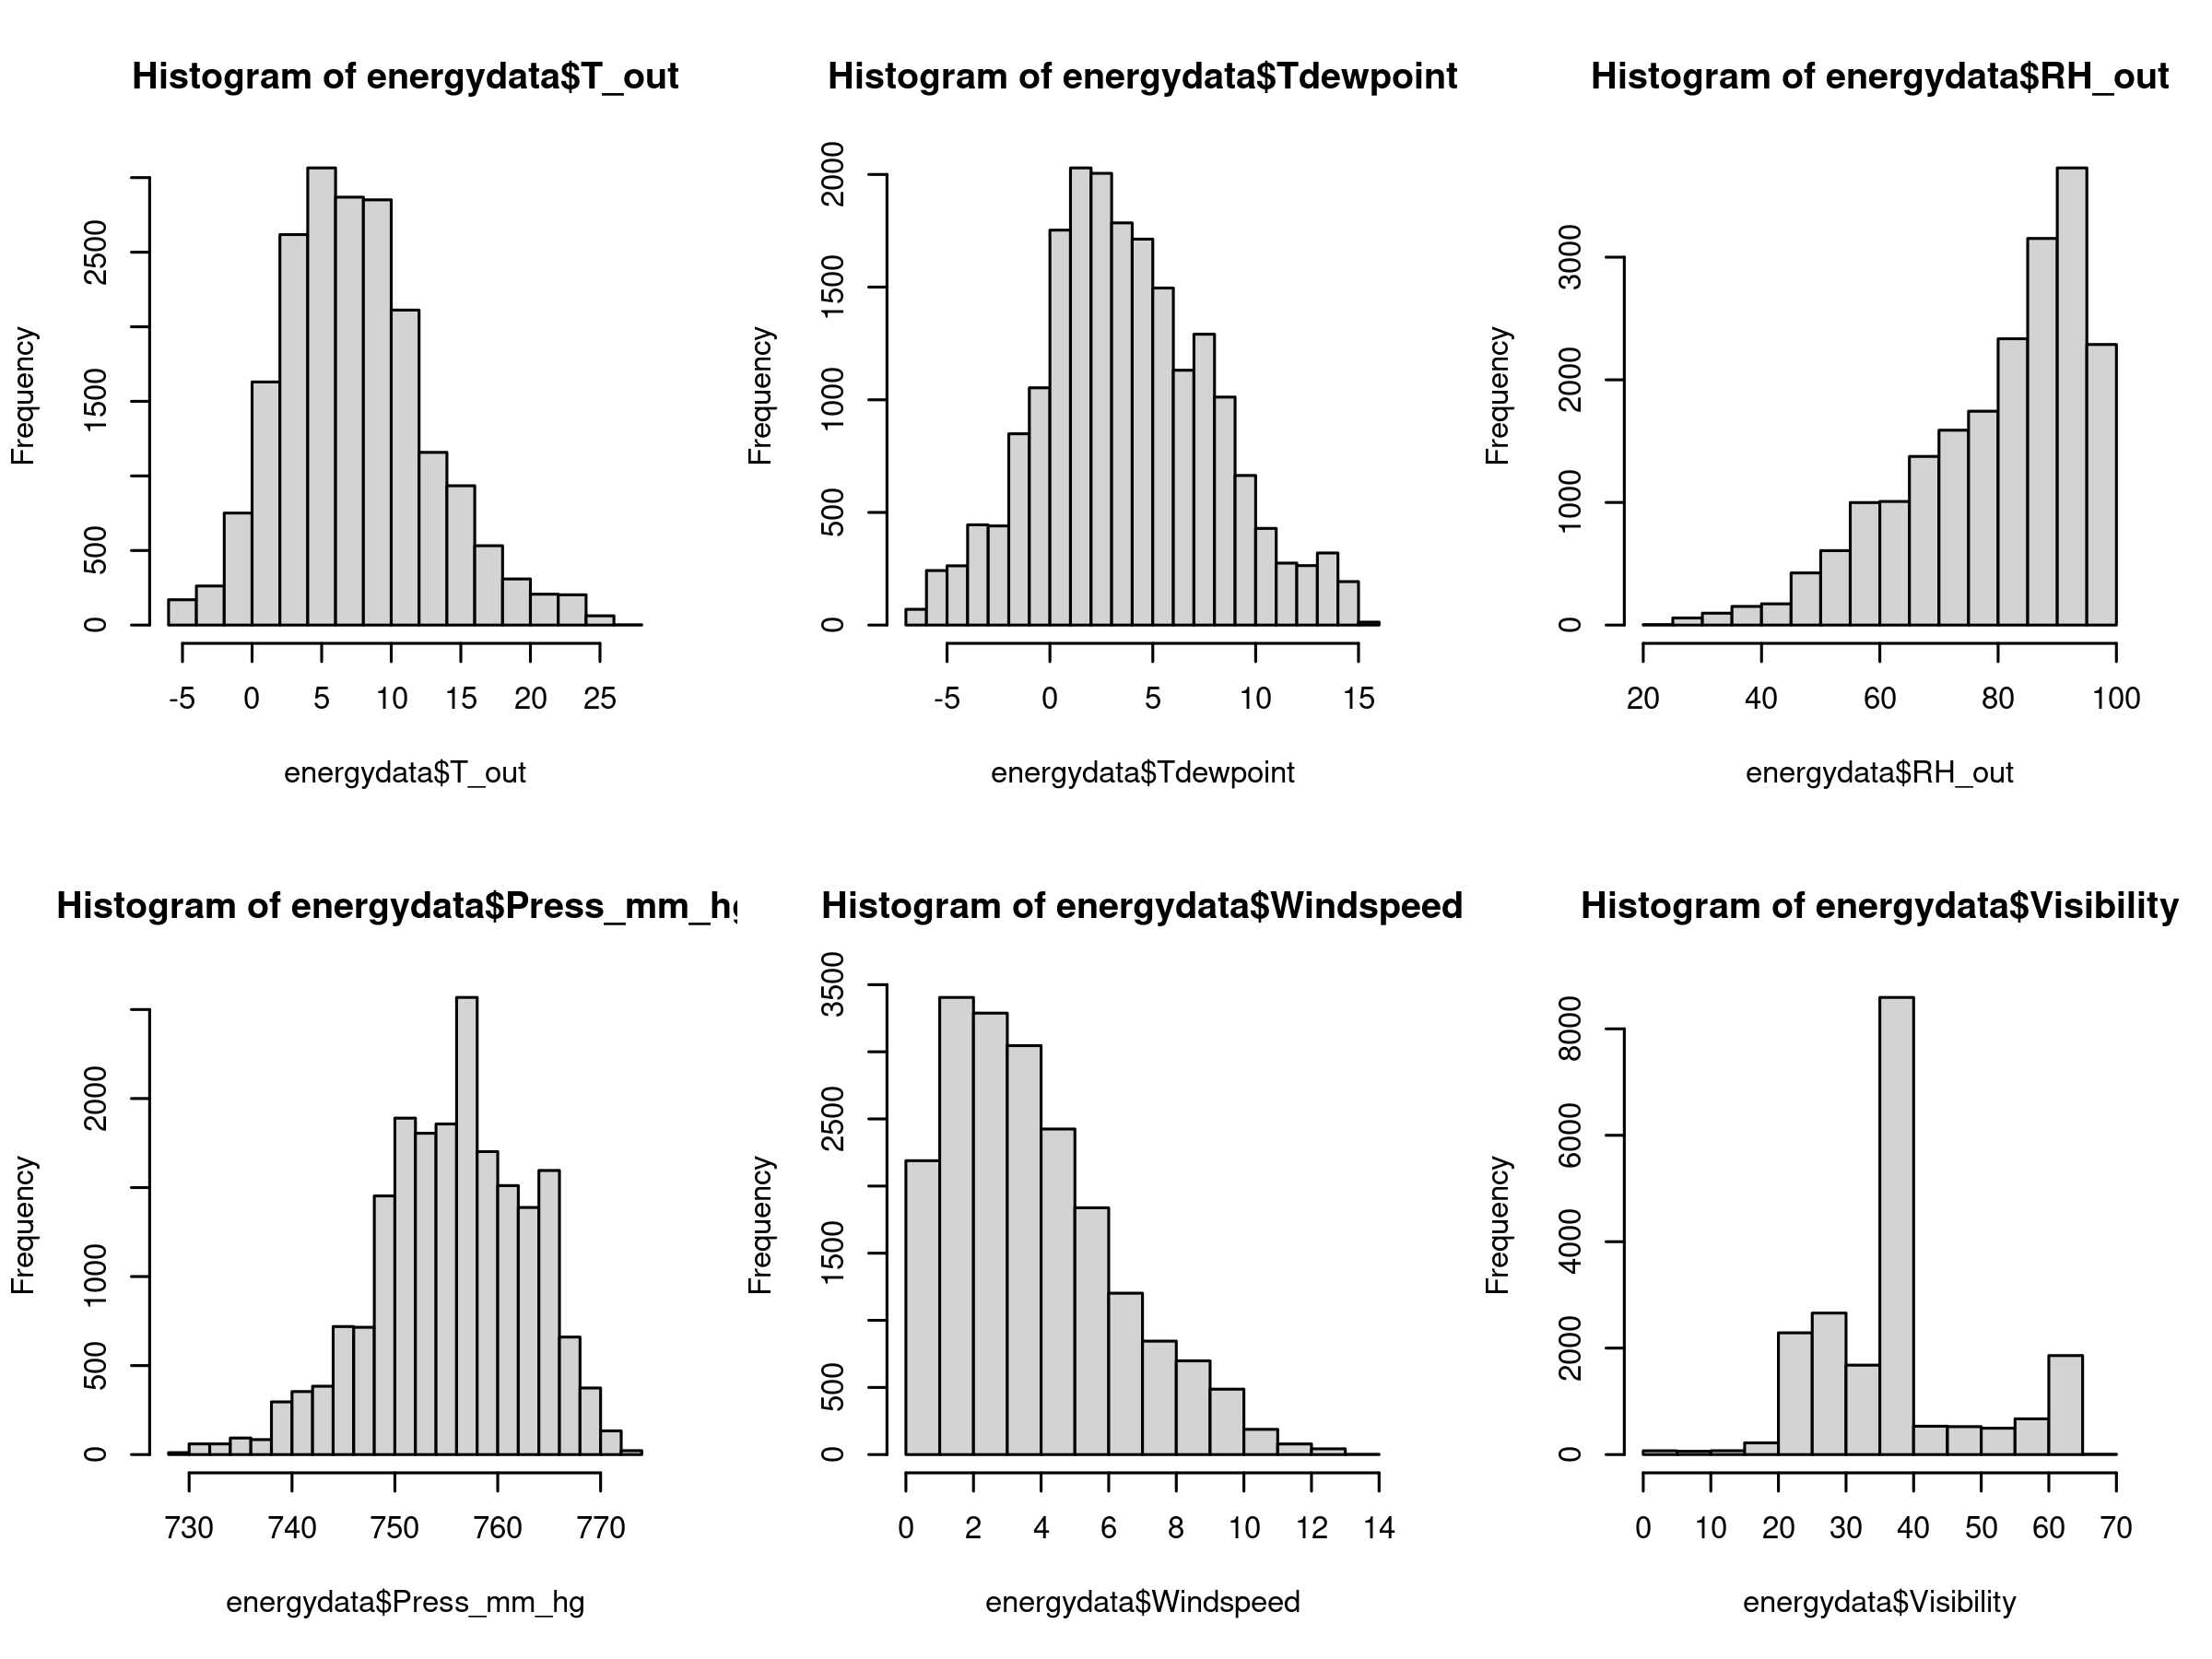

In [97]:
par(mfrow=c(2,3))
hist(energydata$T_out)
hist(energydata$Tdewpoint)
hist(energydata$RH_out)
hist(energydata$Press_mm_hg)
hist(energydata$Windspeed)
hist(energydata$Visibility)

In [98]:
summary(energydata$lights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.802   0.000  70.000 

In [99]:
table(energydata$lights)


    0    10    20    30    40    50    60    70 
15252  2212  1624   559    77     9     1     1 

빛은 0 값이 많기 때문에 모델의 설명변수 설정이 적절치 않아 보였다.

In [101]:
summary(energydata$Appliances)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   50.00   60.00   97.69  100.00 1080.00 

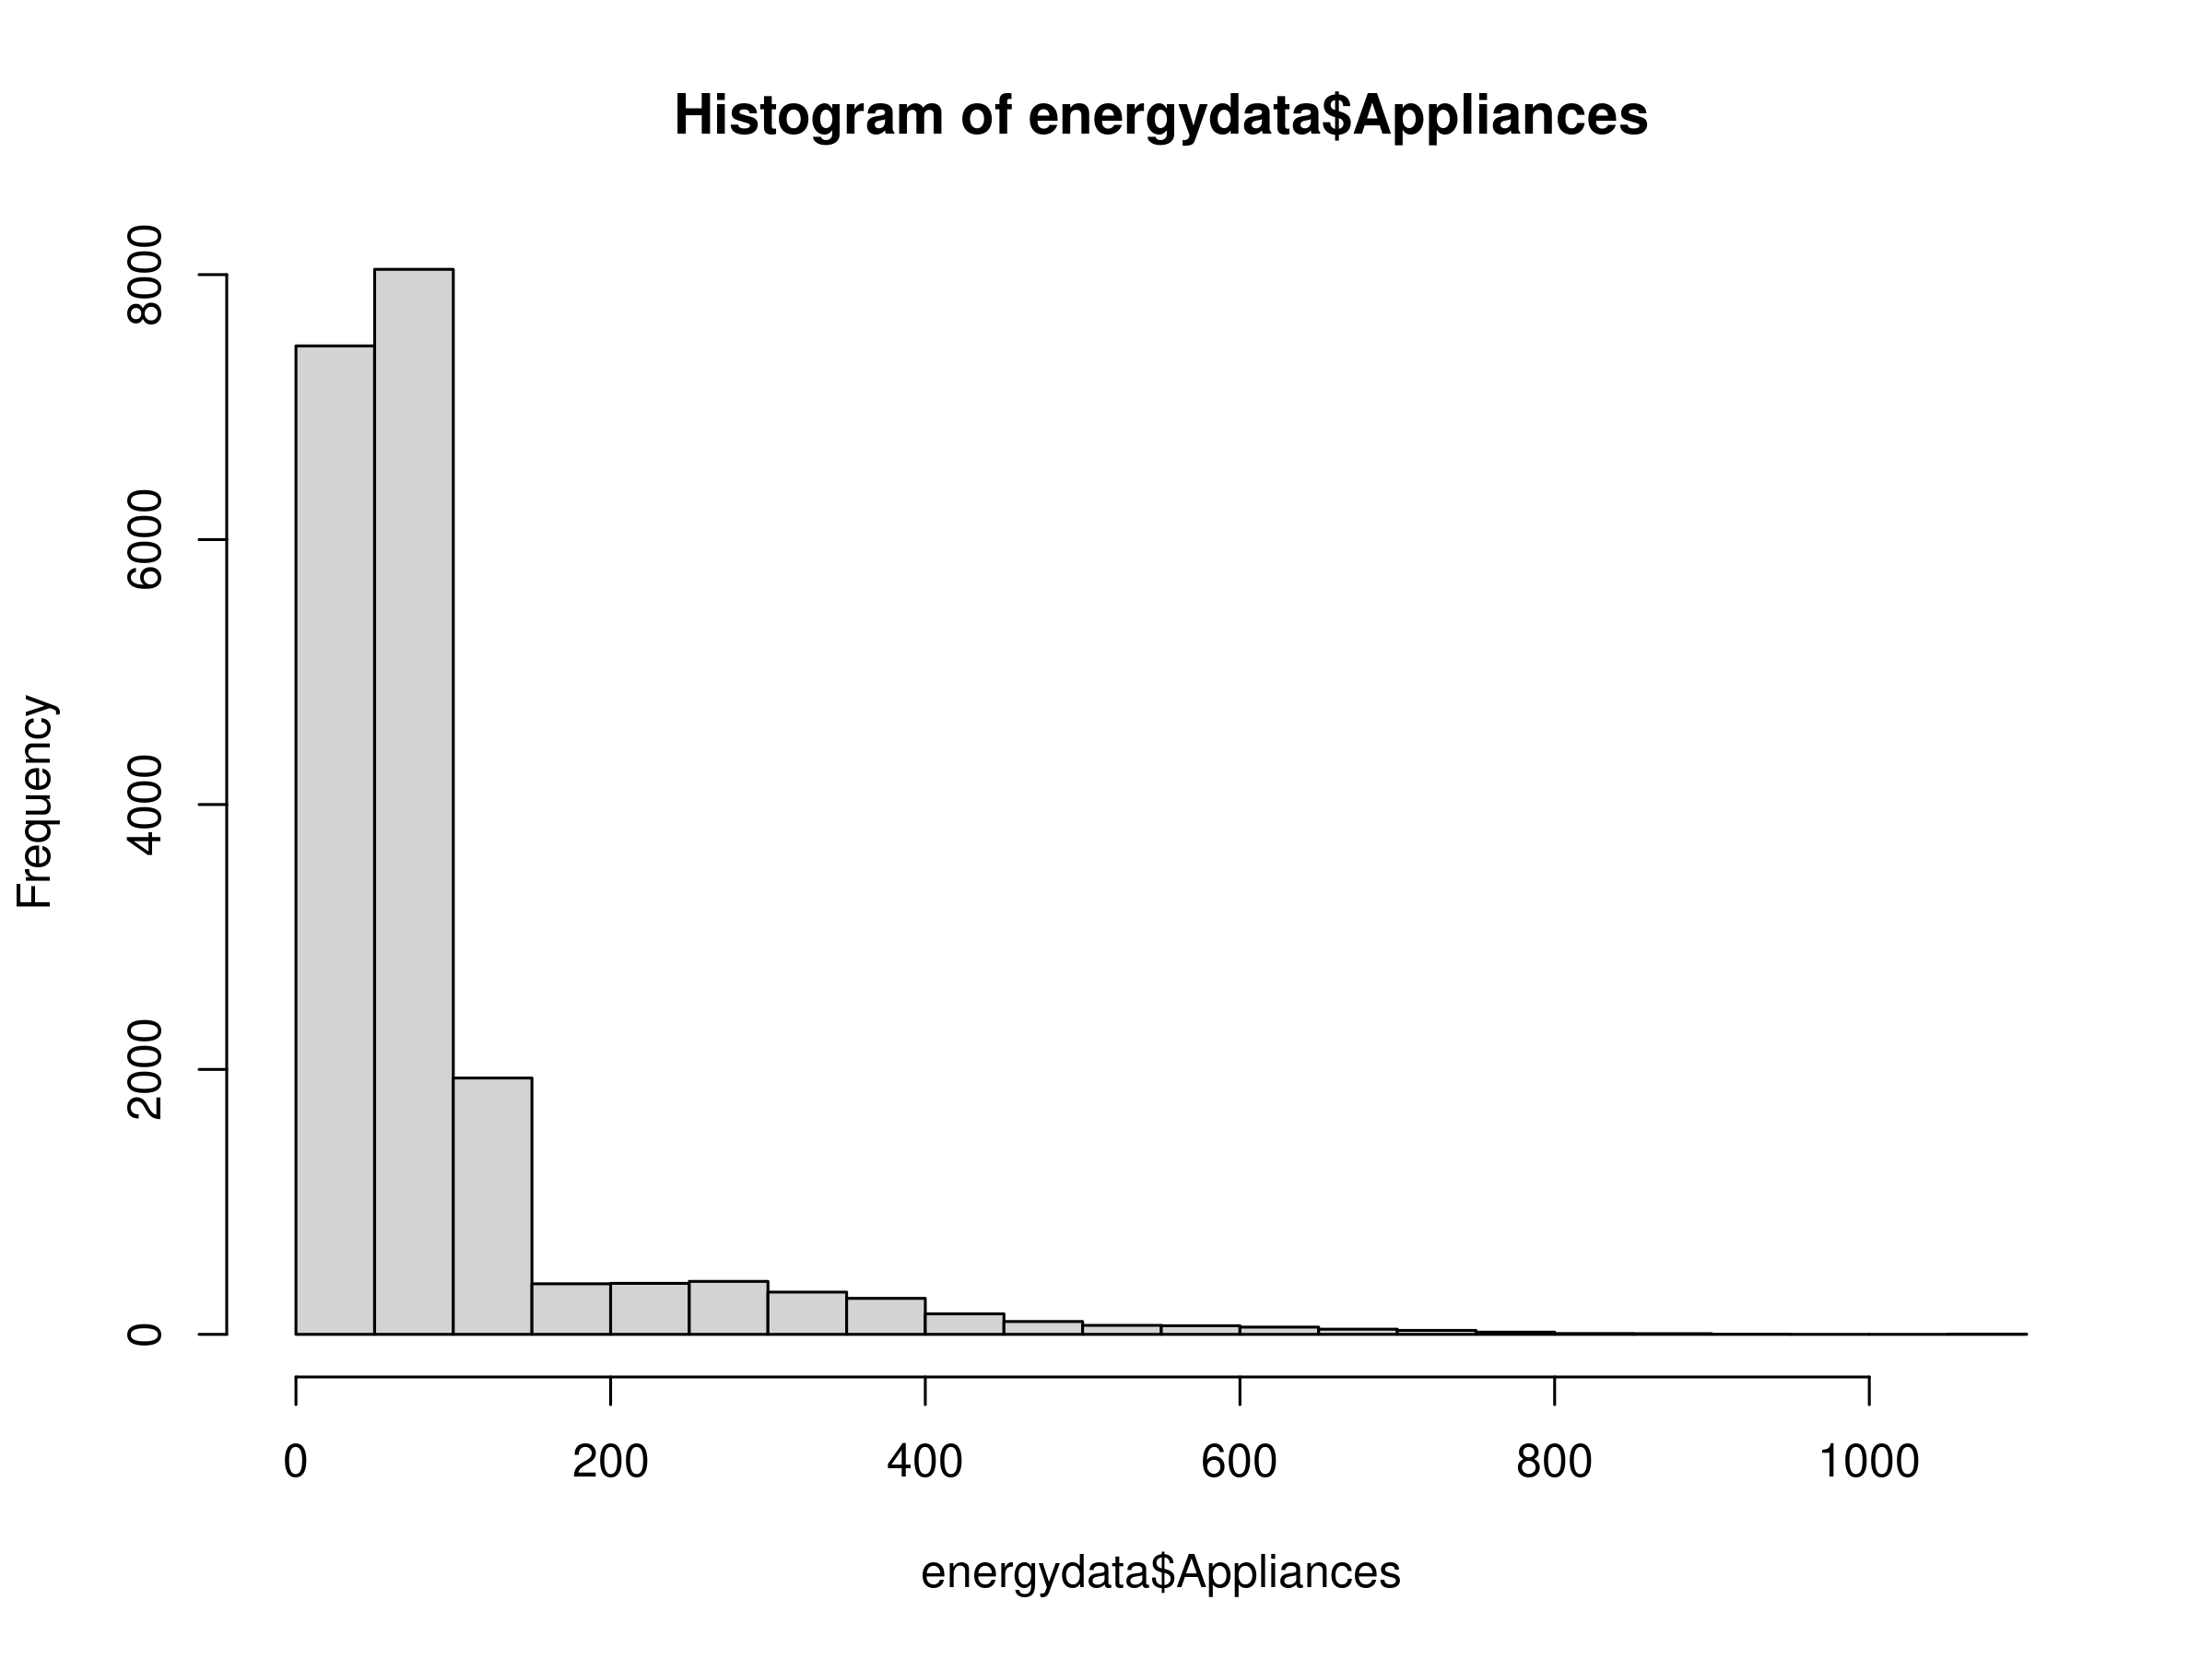

In [102]:
hist(energydata$Appliances)

appliances 데이터 대부분이 100 아래로 존재하며, 이상치로 최대값인 1080이 있다. 

In [130]:
col_name = c("T1","T2","T3","T4","T5","T6","T7","T8","T9",
            "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9",
            "T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility")

In [131]:
cor(energydata[,col_name],energydata$Appliances)

T1,0.0554474719
T2,0.1200732829
T3,0.0850599024
T4,0.0402809830
T5,0.0197598606
T6,0.1176376894
T7,0.0258010446
T8,0.0395719811
T9,0.0100102846
RH_1,0.0860314253
RH_2,-0.0604647600


설명변수와 반응변수 사이의 상관관계 비교.
- 온도는 모두 양의 상관관계에 있었다. 특히 밖에 있는 센서인 6번이 상관관계가 높았다.
- 

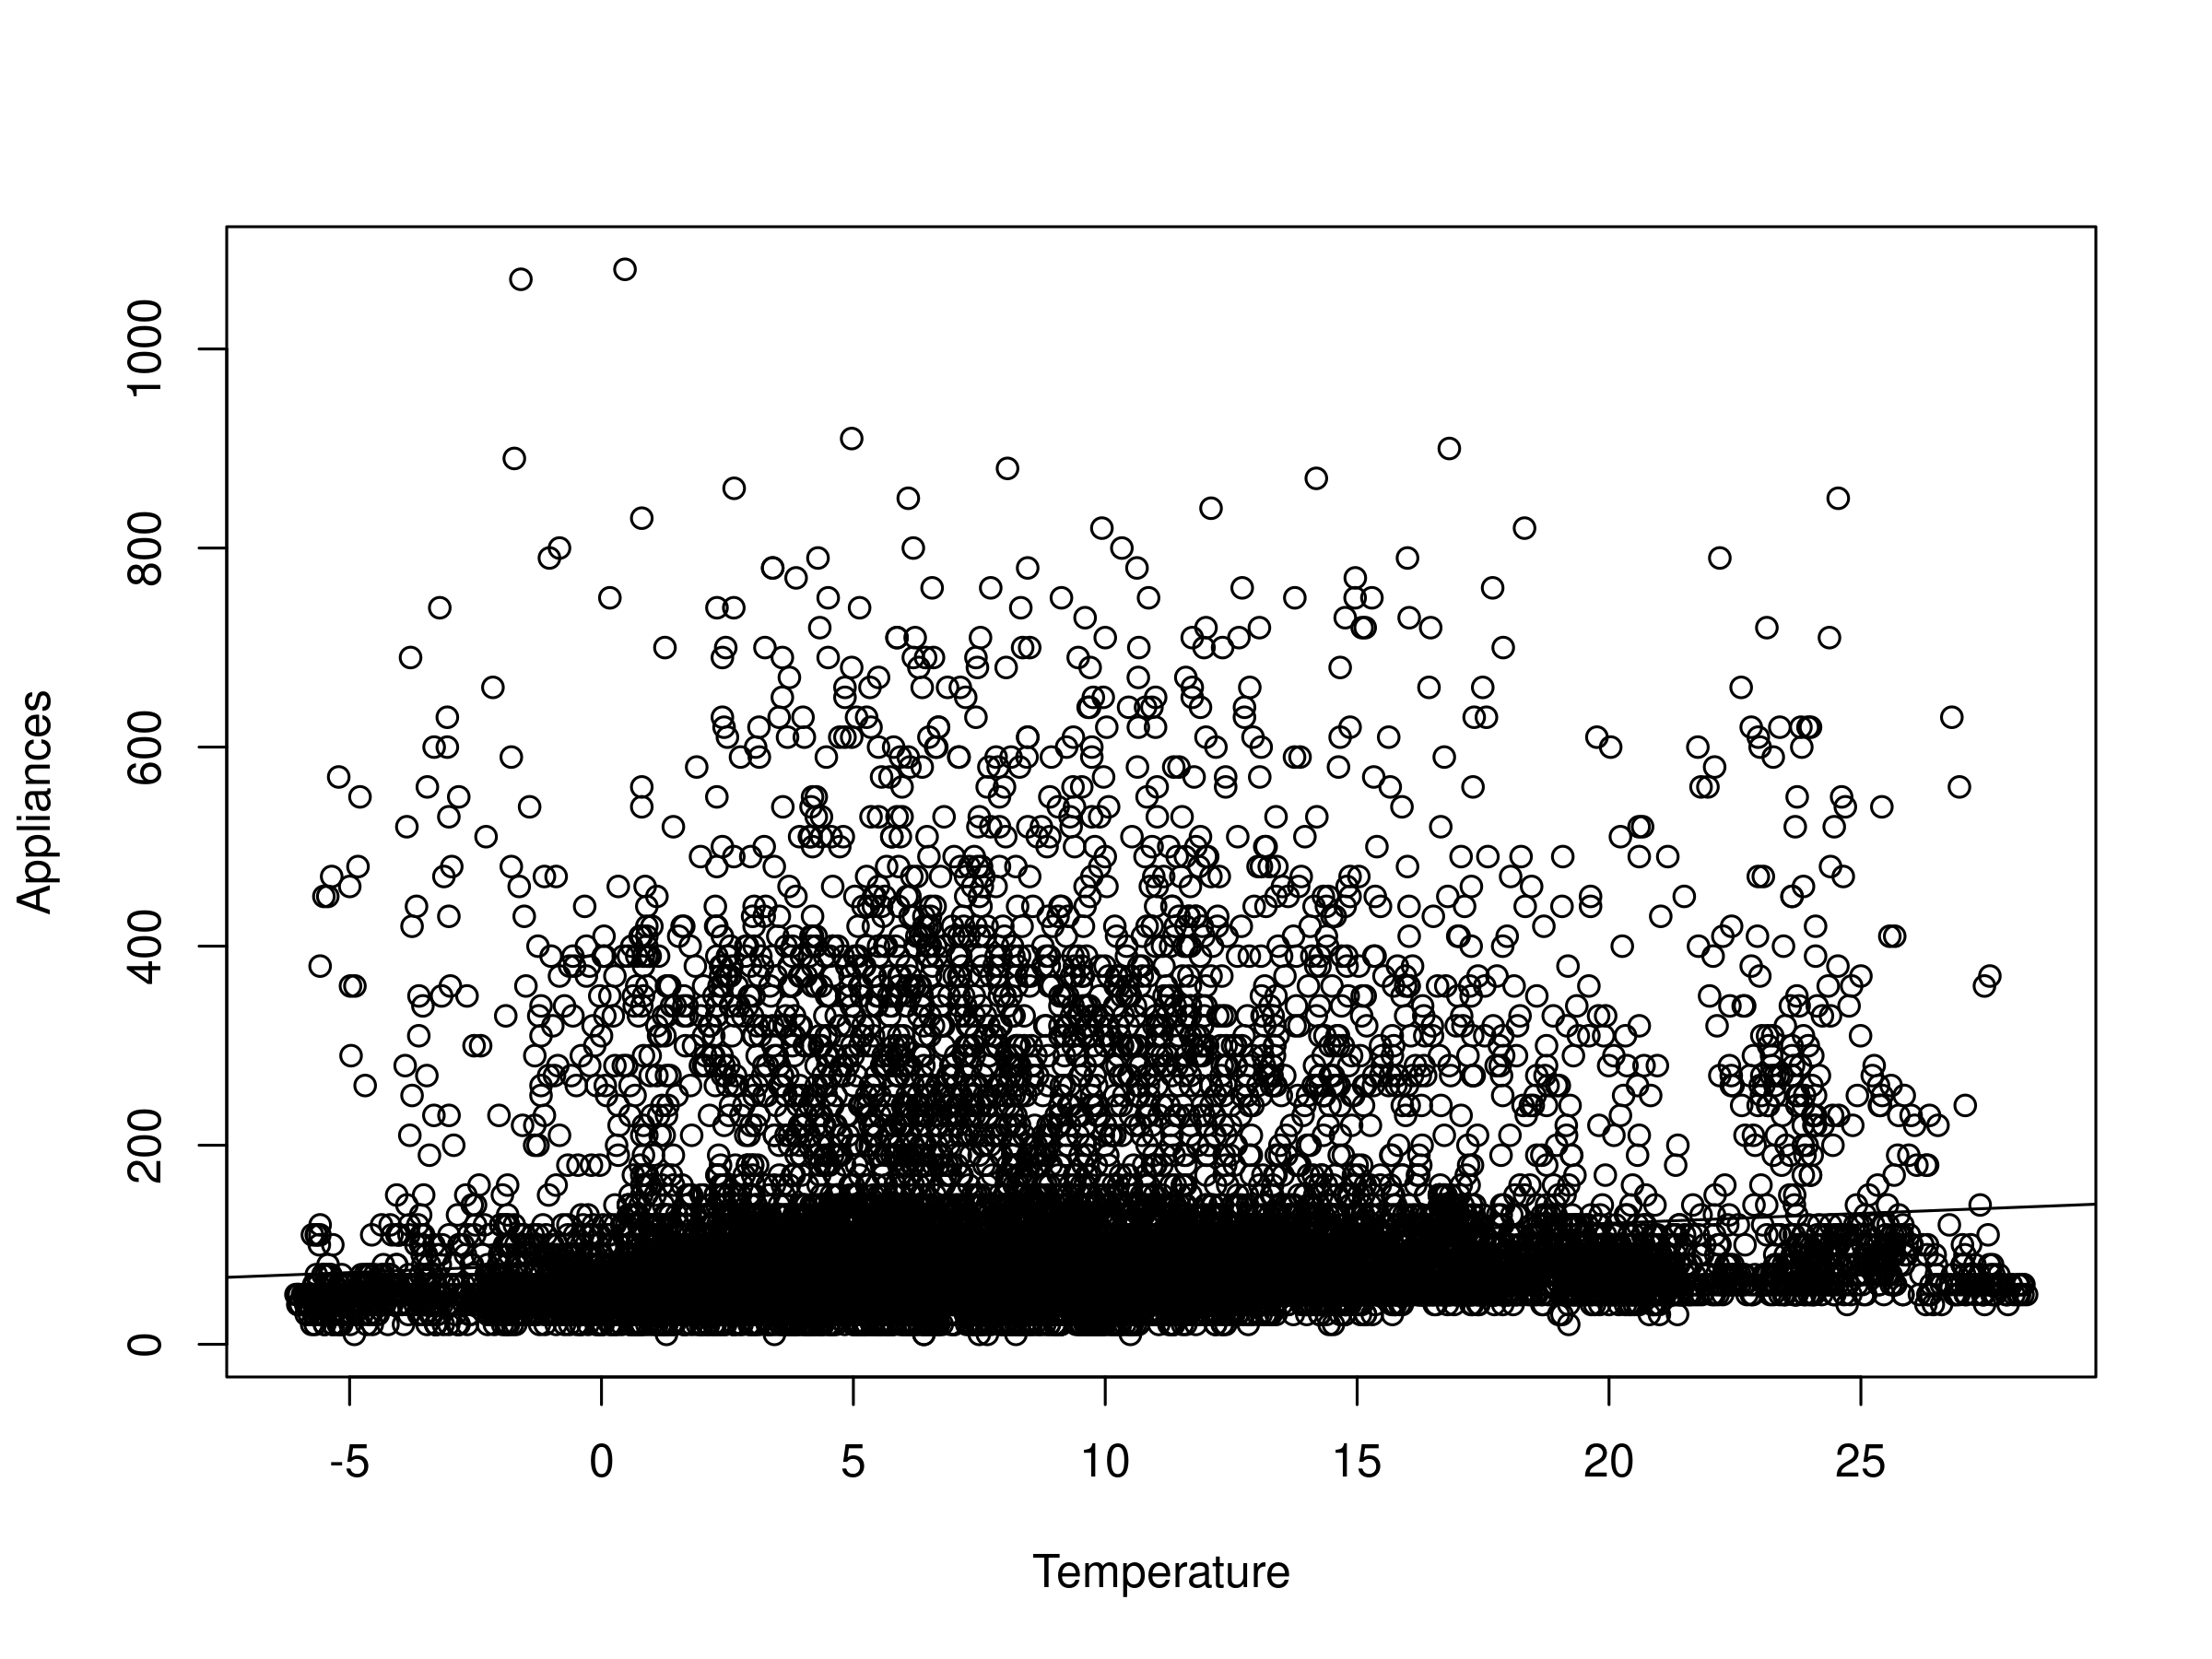

In [134]:
plot(energydata$T6,energydata$Appliances,xlab="Temperature",  ylab="Appliances")
lmod <- lm(Appliances ~ T6, energydata)
abline(lmod)

---

refer

Source:

Luis Candanedo, luismiguel.candanedoibarra '@' umons.ac.be, University of Mons (UMONS).


Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

For more information about the house, data collection, R scripts and figures, please refer to the paper and to the following github repository:

[website]('https://github.com/LuisM78/Appliances-energy-prediction-data')

Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.